In [65]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [66]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [67]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [68]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

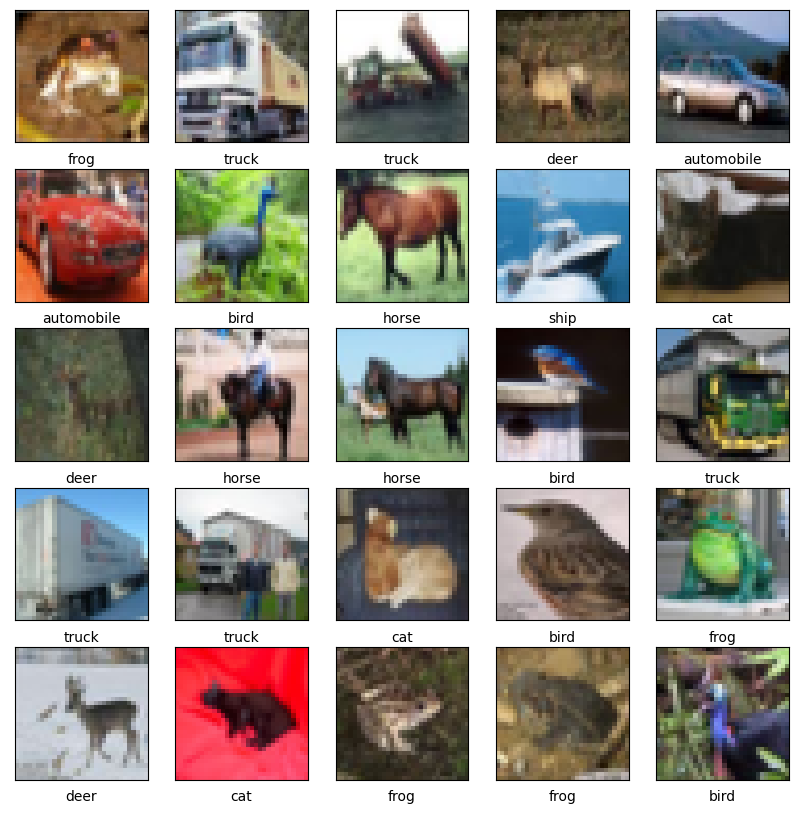

In [69]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [70]:
'''y_train=y_train.reshape(-1,)
y_train'''

'y_train=y_train.reshape(-1,)\ny_train'

In [71]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [76]:
Input_shape=X_train.shape[1:]
Input_shape

(32, 32, 3)

In [77]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))


model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [78]:
#model.summary()

### COMPILE

In [79]:
model.compile(
    optimizer="adam",
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [80]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
782/782 [==============================] - 185s 231ms/step - loss: 1.7269 - accuracy: 0.4059 - val_loss: 1.3076 - val_accuracy: 0.5343
Epoch 2/100
782/782 [==============================] - 181s 231ms/step - loss: 1.1959 - accuracy: 0.5691 - val_loss: 1.1473 - val_accuracy: 0.5993
Epoch 3/100
782/782 [==============================] - 182s 233ms/step - loss: 0.9935 - accuracy: 0.6478 - val_loss: 0.8800 - val_accuracy: 0.6931
Epoch 4/100
782/782 [==============================] - 181s 231ms/step - loss: 0.8839 - accuracy: 0.6907 - val_loss: 0.9060 - val_accuracy: 0.6889
Epoch 5/100
782/782 [==============================] - 892s 1s/step - loss: 0.8127 - accuracy: 0.7163 - val_loss: 0.8793 - val_accuracy: 0.6953
Epoch 6/100
782/782 [==============================] - 168s 215ms/step - loss: 0.7612 - accuracy: 0.7357 - val_loss: 0.7012 - val_accuracy: 0.7577
Epoch 7/100
782/782 [==============================] - 191s 244ms/step - loss: 0.7140 - accuracy: 0.7525 - val_loss: 0.73

In [100]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


313/313 - 5s - loss: 0.4107 - accuracy: 0.8745 - 5s/epoch - 17ms/step
Test Accuracy: 0.8744999766349792


Text(0.5, 1.0, 'Loss Curves')

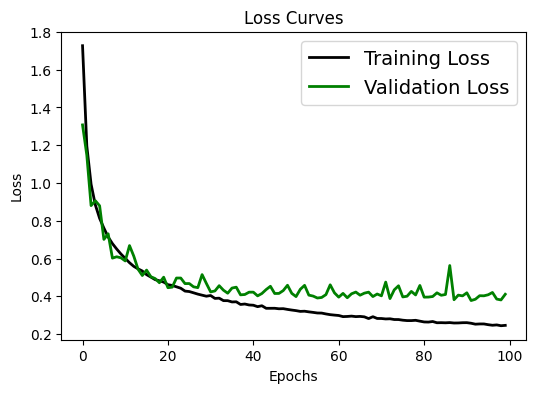

In [87]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

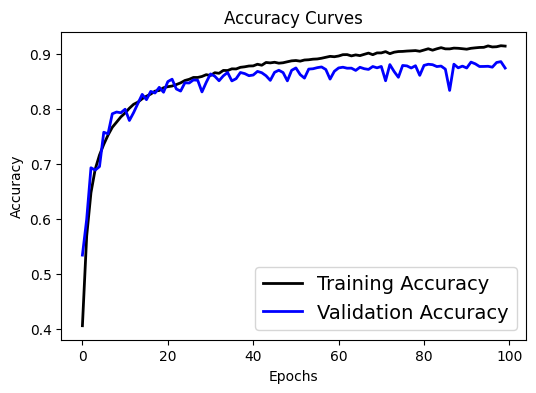

In [88]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [89]:
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 6s 17ms/step
[[1.27747711e-07 2.98120995e-08 1.33819663e-06 ... 6.47530882e-08
  1.67418619e-07 3.16504067e-09]
 [1.14577488e-05 6.94307382e-05 1.73701990e-11 ... 8.28964881e-13
  9.99919057e-01 2.06118838e-08]
 [1.80220034e-03 2.18644757e-02 2.89159161e-05 ... 1.08436188e-06
  9.76033330e-01 1.74265428e-04]
 ...
 [9.67422475e-10 1.86352889e-09 2.77404979e-06 ... 3.69066044e-07
  1.95400096e-09 6.88829704e-09]
 [1.21012636e-04 9.99792635e-01 6.47788909e-07 ... 3.48341723e-06
  1.14517070e-06 1.56488604e-05]
 [1.29653532e-09 6.78144277e-11 5.47993029e-09 ... 9.99995589e-01
  2.14511908e-10 7.32275612e-12]]
[3 8 8 ... 5 1 7]


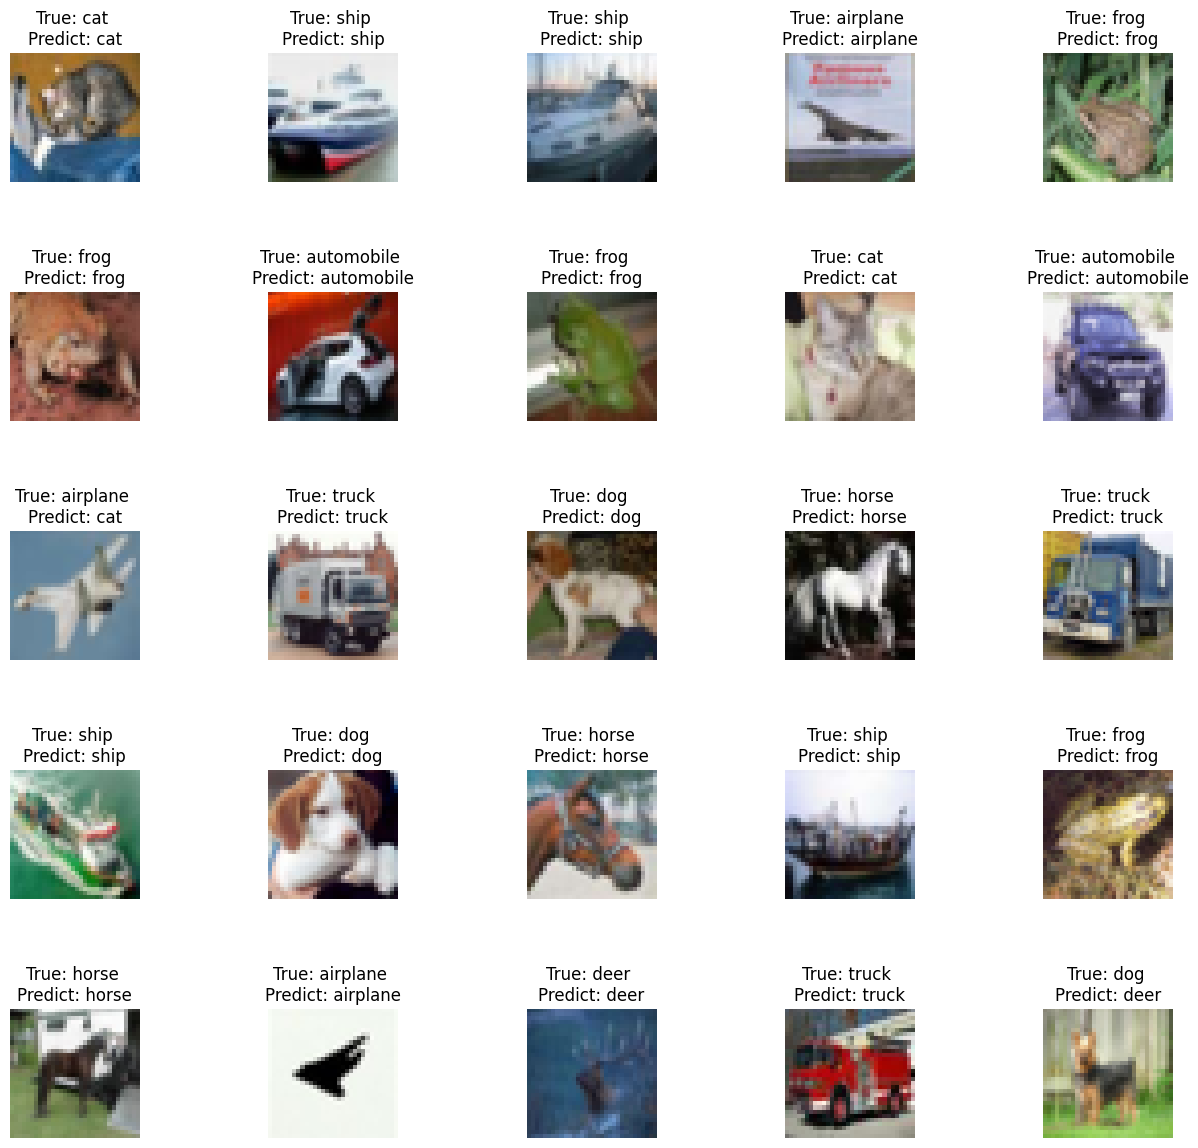

In [90]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [97]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [2]:
from tensorflow.keras.models import model_from_json
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
model.load_weights("model.h5")
print("Loaded model from disk")

NameError: name 'model' is not defined

In [1]:
model.summary()

NameError: name 'model' is not defined